# Stats and probability (2)

### This notebook contain examples for slides page 15-29.
#### Topics covered: 
1. Probablity Mass Function
2. Cumulative Distribution Function
3. Standard Normal Distribution and Probability Density Functgion
4. Probablity estimation based on standard normal distribution (simulated data and real data - height of US male)
5. Normal probablity plot (and using the plot to investigate a problem in height data)

#### Data needed:
1. preg_data.csv
2. brfss.csv

In [1]:
# load modules needed
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import pandas as pd

## 1. Probability mass function (PMF)

In [2]:
df = pd.read_csv('preg_data.csv', index_col=0)
prglength = df['prglength'].values
firstbaby = df.birthord.values == 1
print('number of records: ', len(prglength))
print('number of first baby:', firstbaby.sum())

number of records:  9145
number of first baby: 4412


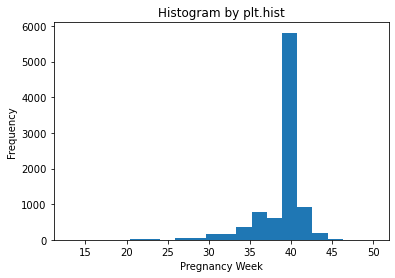

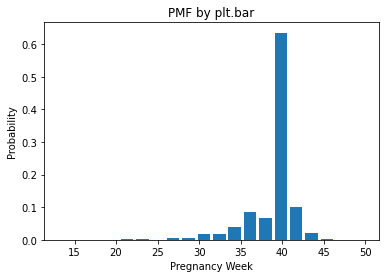

bin bondaries:  [13.   14.85 16.7  18.55 20.4  22.25 24.1  25.95 27.8  29.65 31.5  33.35
 35.2  37.05 38.9  40.75 42.6  44.45 46.3  48.15 50.  ]
len(bin bondaries):  21
counts:  [1.000e+00 0.000e+00 3.000e+00 2.000e+00 9.000e+00 1.400e+01 3.000e+00
 3.800e+01 5.300e+01 1.650e+02 1.640e+02 3.710e+02 7.760e+02 6.070e+02
 5.809e+03 9.150e+02 1.940e+02 1.100e+01 8.000e+00 2.000e+00]
len(counts):  20


In [4]:
counts = plt.hist(prglength, bins=20)
plt.xlabel('Pregnancy Week')
plt.ylabel('Frequency')
plt.title('Histogram by plt.hist')
plt.show()
bin_center = (counts[1][1:]+counts[1][:-1])/2
plt.bar(bin_center, counts[0]/sum(counts[0]), width=1.5)
plt.xlabel('Pregnancy Week')
plt.ylabel('Probability')
plt.title('PMF by plt.bar')
plt.show()
print('bin bondaries: ', counts[1])
print('len(bin bondaries): ', len(counts[1]))
print('counts: ', counts[0])
print('len(counts): ', len(counts[0]))

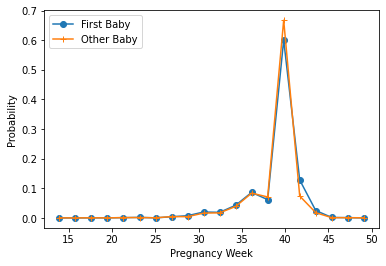

In [5]:
firstbabycounts = plt.hist(prglength[firstbaby], bins=counts[1])
plt.close() # do not show fig; we just need counts from the hist func
otherbabycounts = plt.hist(prglength[~firstbaby], bins=counts[1])
plt.close() # do not show fig; we just need counts from the hist func

# now draw line graph
plt.plot(bin_center, firstbabycounts[0]/sum(firstbaby), '-o', 
         bin_center, otherbabycounts[0]/sum(~firstbaby), '-+')
plt.xlabel('Pregnancy Week')
plt.ylabel('Probability')
plt.legend(('First Baby', 'Other Baby'))
plt.show()

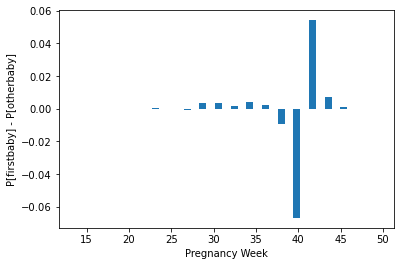

In [40]:
plt.bar(bin_center, firstbabycounts[0]/sum(firstbaby) - otherbabycounts[0]/sum(~firstbaby))
plt.xlabel('Pregnancy Week')
plt.ylabel('P[firstbaby] - P[otherbaby]')
plt.show()

## 2. Cumulative distribution function (CDF)

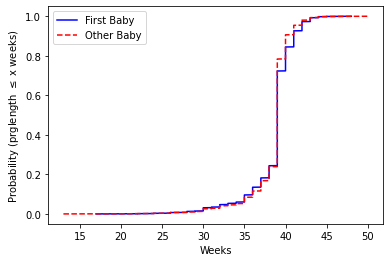

In [45]:
nFirstBaby = np.sum(firstbaby)
nOtherBaby = np.sum(~firstbaby)
plt.plot(np.sort(prglength[firstbaby]), range(1,nFirstBaby+1)/nFirstBaby, '-b')
plt.plot(np.sort(prglength[~firstbaby]), range(1,nOtherBaby+1)/nOtherBaby, 'r--')
plt.legend(('First Baby', 'Other Baby'))
plt.xlabel('Weeks')
plt.ylabel('Probability (prglength $\leq$ x weeks)') # $\leq$ is latex code for less than or equal
plt.show()


### PMF vs CDF

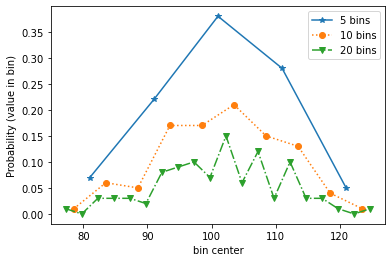

In [126]:
def myHistData(data, bins=20):
    counts = plt.hist(a, bins)
    plt.close()
    binCenter = (counts[1][1:] + counts[1][:-1]) / 2
    freq = counts[0] / len(data)
    return (binCenter, freq)

a = (np.random.randn(100) * 10 + 100).round()

bin5, freq5 = myHistData(a, bins=5)
bin10, freq10 = myHistData(a, bins=10)
bin20, freq20 = myHistData(a, bins=20)
plt.plot(bin5, freq5, '-*', bin10, freq10, ':o', bin20,freq20, '-.v')
plt.legend(('5 bins', '10 bins', '20 bins'))
plt.xlabel('bin center')
plt.ylabel('Probability (value in bin)')
plt.show()

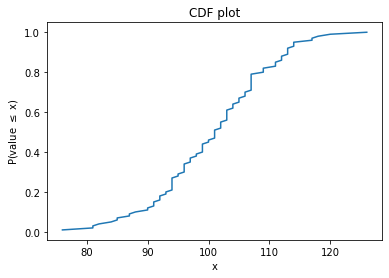

In [128]:
# CDF plot using sort function
prob = (np.arange(len(a))+1)/len(a)
plt.plot(np.sort(a), prob)
plt.xlabel('x')
plt.ylabel('P(value $\leq$ x)')
plt.title('CDF plot')
plt.show()

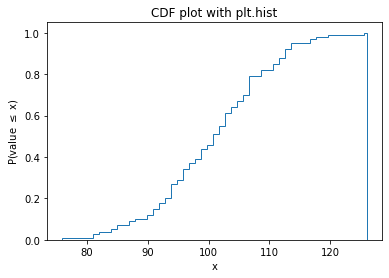

In [130]:
# CDF with the hist function; changing nbins will change the look
plt.hist(a, cumulative=True, bins=len(a)+1, density=True, histtype='step') 
plt.xlabel('x')
plt.ylabel('P(value $\leq$ x)')
plt.title('CDF plot with plt.hist')
plt.show()

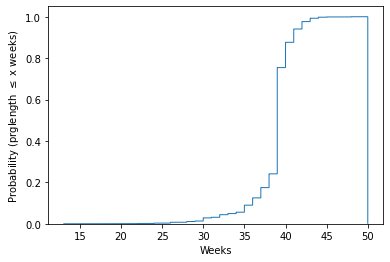

In [132]:
# CDF with the hist function; changing nbins will change the look
plt.hist(prglength, cumulative=True, bins=len(prglength)+1, density=True, histtype='step') 
plt.xlabel('Weeks')
plt.ylabel('Probability (prglength $\leq$ x weeks)') # $\leq$ is latex code for less than or equal
plt.show()

## 3. Standard normal distribution and probability density function

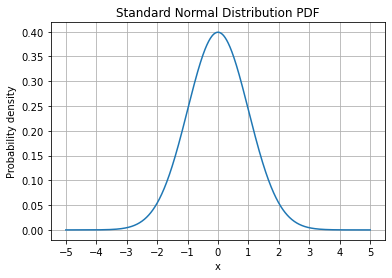

In [147]:
x = np.linspace(-5,5,10**3)
y = norm.pdf(x, 0, 1)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Standard Normal Distribution PDF')
plt.xticks(np.arange(-5, 6))
plt.grid()
plt.show()

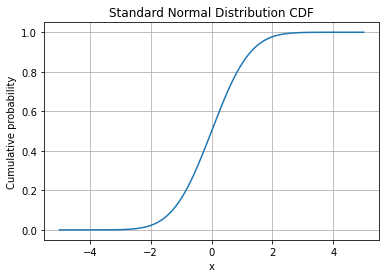

In [142]:
x = np.linspace(-5,5,10**3)
y = norm.cdf(x, 0, 1)
plt.plot(x, y); 
plt.xlabel('x'); 
plt.ylabel('Cumulative probability'); 
plt.title('Standard Normal Distribution CDF')
plt.grid()
plt.show()

## 4. Using standard normal distrubtion for quick probabilty estimation

### 4.1 Simulated data

In [184]:
# Generate 1000 data points that are approx normally distributed, with mean 0, and standard deviation = 1
a = np.random.randn(1000) 

In [185]:
# How many values are less than 0?
p = norm.cdf(0)
expected = p * len(a)
observed = (a < 0).sum()
print('# expected: %d / %d' % (expected, len(a)))
print('# observed: %d / %d' % (observed, len(a)))

# expected: 500 / 1000
# observed: 499 / 1000


In [186]:
# How many values are between -0.5 and 0.5?
p = norm.cdf(0.5) - norm.cdf(-0.5)
expected = p * len(a)
observed = ((a < 0.5) & (a > -0.5)).sum()

print('# expected: %d / %d' % (expected, len(a)))
print('# observed: %d / %d' % (observed, len(a)))

# expected: 382 / 1000
# observed: 378 / 1000


In [187]:
# How many values are greater than 2?
p = 1 - norm.cdf(2)

expected = p * len(a)
observed = (a > 2).sum()

print('# expected: %d / %d' % (expected, len(a)))
print('# observed: %d / %d' % (observed, len(a)))

# expected: 22 / 1000
# observed: 19 / 1000


#### Why is 95% confidence interval 1.96 * SEM?

In [188]:
# How many are between -1.96 and 1.96?

p = norm.cdf(1.96) - norm.cdf(-1.96)
expected = p * len(a)
observed = ((a < 1.96) & (a > -1.96)).sum()

print('# expected: %d / %d' % (expected, len(a)))
print('# observed: %d / %d' % (observed, len(a)))

# expected: 950 / 1000
# observed: 954 / 1000


#### What is the confidence level for 1 SEM?

In [189]:
# How many values are between -1 and 1?
p = norm.cdf(1) - norm.cdf(-1)
expected = p * len(a)
observed = ((a < 1) & (a > -1)).sum()

print('# expected: %d / %d' % (expected, len(a)))
print('# observed: %d / %d' % (observed, len(a)))

# expected: 682 / 1000
# observed: 688 / 1000


#### What is the confidence level for 3 SEM?

In [191]:
# How many values are between -3 and 3?
p = norm.cdf(3) - norm.cdf(-3)
expected = p * len(a)
observed = ((a < 3) & (a > -3)).sum()

print('# expected: %d / %d' % (expected, len(a)))
print('# observed: %d / %d' % (observed, len(a)))

# expected: 997 / 1000
# observed: 994 / 1000


### 4.2 Estimation using height data as example

#### Height of US male adults roughly follows a normal distribution with mean 178 cm (\~5'10" or 70") and std 7.7 cm (\~3") 

##### What percentage of US male population is between 5’10” *177.8cm) and 6’1” (73", or 185.4cm)?

In [293]:
# quick estimate
high = (73 - 70) / 3
low = 0
p = norm.cdf(high)-0.5
print('Answer: %d %%' %(100*p))

Answer: 34 %


In [295]:
# more accurate estimate
high = (185.4 - 178.1) / 7.7
low = (177.8 - 178.1) / 7.7
p = norm.cdf(high)-norm.cdf(low)
print('Answer: %.2f %%' %(100*p))

Answer: 34.40 %


#### What percentage of US male population is taller than 6'1"?

In [297]:
low = (73 - 70) / 3
p = 1 - norm.cdf(low)
print('Answer: %.2f %%' %(100*p))

Answer: 15.87 %


#### What percentage of US male population is taller than 6'4"?

In [302]:
low = (76 - 70) / 3
p = 1 - norm.cdf(low)
print('Answer: %.4f %%' %(100*p))

Answer: 2.2750 %


#### What percentage of US male population is taller than 6'7"?

In [310]:
low = (79 - 70) / 3
p = 1 - norm.cdf(low)
print('Answer: %.4f %%' %(100*p))

Answer: 0.1350 %


#### What percentage is taller than 6'10"?

In [301]:
low = (82 - 70) / 3
p = 1 - norm.cdf(low)
print('Answer: %.4f %%' %(100*p))

Answer: 0.0032 %


### Verify with real data

In [10]:
# load some real data to see by yourself
df = pd.read_csv('brfss.csv')
h = df.htm3[(df.sex==1) & ~np.isnan(df.htm3)].values # height of Us male
w = df.wtkg2[(df.sex==1) & ~np.isnan(df.wtkg2)].values # weight of US male. not in same order as height data, due to NaN removal


#### What percentage is taller than 6'10"?

In [327]:
n = (h > 82*2.54).sum()
p = n / len(h)
print('Actual: %d / %d = %.4f %%' %(n, len(h), 100*p))
print('Theory: %.3f %%' % (100*(1 - norm.cdf(4))))

Actual: 46 / 154407 = 0.0298 %
Theory: 0.003 %


#### What percentage is taller than 6'7"?

In [328]:
n = (h > 79*2.54).sum()
p = n / len(h)
print('Answer: %d / %d = %.4f %%' %(n, len(h), 100*p))
print('Theory: %.3f %%' % (100*(1 - norm.cdf(3))))

Answer: 492 / 154407 = 0.3186 %
Theory: 0.135 %


#### What percentage is taller than 6'4"?

In [329]:
n = (h > 76 * 2.54).sum()
p = n / len(h)
print('Answer: %d / %d = %.4f %%' %(n, len(h), 100*p))
print('Theory: %.3f %%' % (100*(1 - norm.cdf(2))))

Answer: 2206 / 154407 = 1.4287 %
Theory: 2.275 %


#### What percentage is taller than 6'1"?

In [330]:
n = (h > 73 * 2.54).sum()
p = n / len(h)
print('Answer: %d / %d = %.4f %%' %(n, len(h), 100*p))
print('Theory: %.3f %%' % (100*(1 - norm.cdf(1))))

Answer: 18732 / 154407 = 12.1316 %
Theory: 15.866 %


#### What percentage of US male population is between 5’10” *177.8cm) and 6’1” (73", or 185.4cm)?

In [332]:
n = ((h < 185.4) & (h > 177.8)).sum()
p = n / len(h)
print('Answer: %d / %d = %.4f %%' %(n, len(h), 100*p))

print('Theory: %.3f %%' % (100*(norm.cdf(1)-0.5)))

Answer: 73697 / 154407 = 47.7291 %
Theory: 34.134 %


## *What is happening????*

### 4.3 Is my data actually normally distributed?

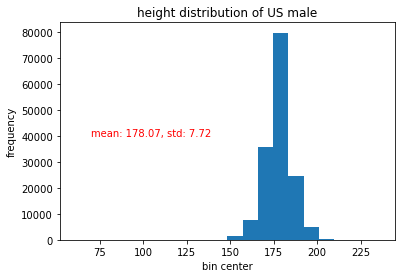

In [14]:
def plotHist(data, title='histogram', xlabel='bin center', ylabel='frequency'):
    counts = plt.hist(data, 20) # plot histogram and return counts containing frequency and bin center data 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    m = np.mean(data)
    s = np.std(data)
    str_m = 'mean: %.2f, std: %.2f' %(m, s) # text to be displayed on fig
    plt.annotate(str_m, [counts[1][1], np.max(counts[0])/2], color='red') # location of text aligned with second bin center and half max frequency
    plt.show()
    
plotHist(h, 'height distribution of US male')

## 5. Normal probablity plot

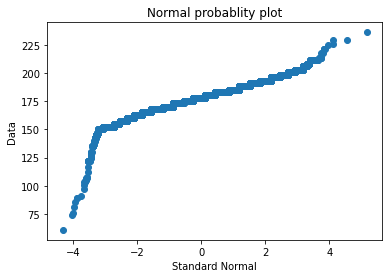

In [13]:
def normProbPlot(data, ylabel='Data', title='Normal probablity plot'):
    a = np.random.randn(len(data))
    plt.scatter(np.sort(a), np.sort(data))
    plt.xlabel('Standard Normal')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
normProbPlot(h)

Removed 666 / 154407 = 0.43 % of cases


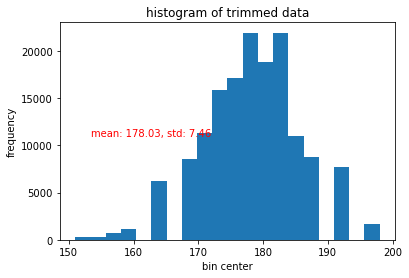

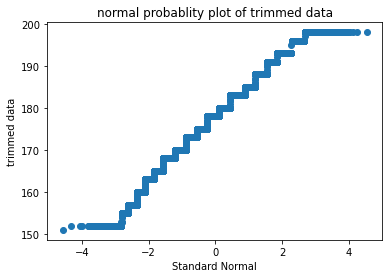

In [345]:
h2=h[(h > 150) & (h < 200)]
print('Removed %d / %d = %.2f %% of cases' %(len(h)-len(h2), len(h), (len(h)-len(h2))/len(h)*100))
plotHist(h2, 'histogram of trimmed data')
normProbPlot(h2, ylabel='trimmed data', title='normal probablity plot of trimmed data')


##### What percentage of US male population is between 5’10” *177.8cm) and 6’1” (73", or 185.4cm)?

In [364]:
n = ((h2 < 185.4) & (h2 > 177.8)).sum()
p = n / len(h2)
print('Answer: %d / %d = %.4f %%' %(n, len(h), 100*p))

high = (185.4 - h2.mean()) / h2.std()
low = (177.8 - h2.mean()) / h2.std()
print('Theory: %.3f %%' % (100*(norm.cdf(high)-norm.cdf(low))))

Answer: 73697 / 154407 = 47.9358 %
Theory: 35.081 %


In [365]:
(h == 178).sum() / len(h)

0.14181999520747116

### Evil integer ....

In [351]:
(h == 178).sum() ### Evil number.....

21898

In [352]:
np.unique(h).shape

(90,)

#### Data is not really continuous

In [367]:
counts=np.unique(h, return_counts=True)
counts

(array([ 61.,  74.,  76.,  81.,  86.,  89.,  91.,  97., 101., 103., 104.,
        105., 106., 107., 108., 112., 117., 122., 125., 127., 130., 135.,
        137., 140., 142., 143., 145., 147., 150., 151., 152., 153., 154.,
        155., 156., 157., 158., 159., 160., 161., 162., 163., 164., 165.,
        166., 167., 168., 169., 170., 171., 172., 173., 174., 175., 176.,
        177., 178., 179., 180., 181., 182., 183., 184., 185., 186., 187.,
        188., 189., 190., 191., 192., 193., 195., 196., 197., 198., 200.,
        201., 203., 205., 206., 208., 211., 213., 218., 221., 225., 226.,
        229., 236.]),
 array([    1,     1,     1,     1,     1,     2,     1,     1,     1,
            2,     1,     2,     1,     2,     1,     1,     1,     9,
            2,     5,     3,    10,     4,     4,    10,     1,    17,
           11,    74,     1,   336,     3,     3,   304,     5,   731,
           11,     4,  1159,     3,    15,  2329,    12,  3931,     9,
           22,  8572,    12, 11

In [274]:
filtered=np.array(counts)[:, counts[1]>1000]
filtered

array([[  160.,   163.,   165.,   168.,   170.,   173.,   175.,   178.,
          180.,   183.,   185.,   188.,   191.,   193.,   196.],
       [ 1159.,  2329.,  3931.,  8572., 11292., 15852., 17136., 21898.,
        18850., 21945., 10989.,  8781.,  4686.,  3049.,  1157.]])

<BarContainer object of 15 artists>

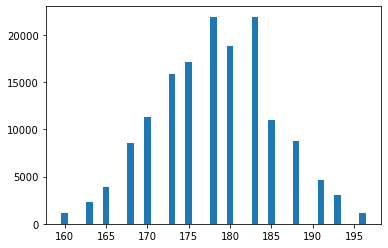

In [354]:
plt.bar(filtered[0], filtered[1])

#### What percentage of US male population is between 5’10” *177.8cm) and 6’1” (73", or 185.4cm)?

In [368]:
n = ((h < 185.4) & (h > 178)).sum()
p = n / len(h)
print('Actual: %d / %d = %.2f %%' %(n, len(h), 100*p))

high = (185.4 - h.mean()) / h.std()
low = (177.8 - h.mean()) / h.std()
print('Theory: %.2f %%' % (100*(norm.cdf(high)-norm.cdf(low))))

Actual: 51799 / 154407 = 33.55 %
Theory: 34.26 %


### Theory is rescued! YAH!

#### probability distribution of US male weight data

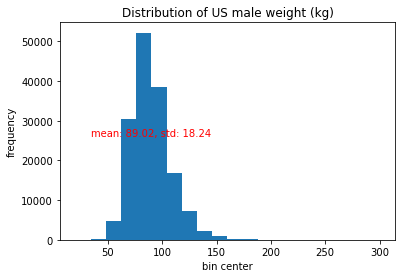

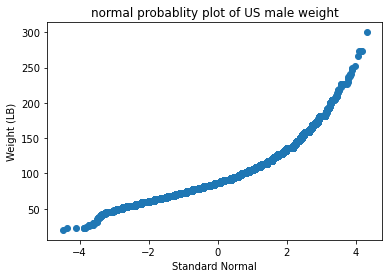

In [16]:
plotHist(w, 'Distribution of US male weight (kg)')
normProbPlot(w, ylabel='Weight (LB)', title='normal probablity plot of US male weight')

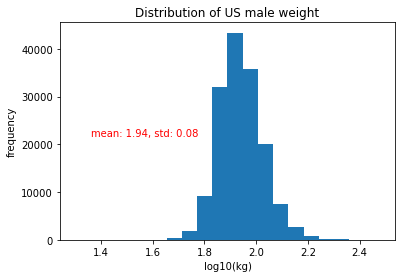

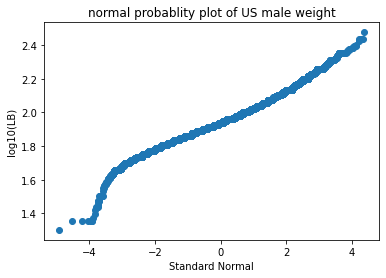

In [17]:
plotHist(np.log10(w), xlabel='log10(kg)', title='Distribution of US male weight')
normProbPlot(np.log10(w), ylabel='log10(LB)', title='normal probablity plot of US male weight')